In [12]:
# State Tax Collections http://www2.census.gov/govs/statetax/14staxcd.txt
# Geo Data http://download.geonames.org/export/dump/
# Subsidized Households 2008 http://www.HUDuser.org/portal/picture2008/2008_tract.zip
# Zip Codes https://www.aggdata.com/node/86
# Unemployment Rates http://www.bls.gov/lau/laucntycur14.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
sal = pd.read_csv('../Data/salaries_parent.csv')
sal.shape

(1444, 152)

In [14]:
sal.head(5)

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T51,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60
0,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
1,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
2,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
3,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
4,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN


In [15]:
sal.mean()

Zip                                                               5.465744e+04
B19013_001                                                        4.768131e+04
no_male_hs_p                                                      9.085053e+00
no_female_hs_p                                                    8.216080e+00
at_least_hs_male_p                                                9.091495e+01
at_least_hs_female_p                                              9.178392e+01
at_least_bach_male_p                                              4.441843e+01
at_least_bach_female_p                                            4.946938e+01
male_unemployment                                                 6.126710e+00
female_unemployment                                               5.986530e+00
snap                                                              1.092064e+01
renter                                                            5.686790e+01
median_rent                                         

In [16]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
sal2.shape

(1412, 153)

In [17]:
sal2.mean()

Zip                                                               5.445178e+04
B19013_001                                                        4.753726e+04
no_male_hs_p                                                      8.709738e+00
no_female_hs_p                                                    8.205198e+00
at_least_hs_male_p                                                9.129026e+01
at_least_hs_female_p                                              9.179480e+01
at_least_bach_male_p                                              4.492534e+01
at_least_bach_female_p                                            4.949808e+01
male_unemployment                                                 6.185822e+00
female_unemployment                                               6.009028e+00
snap                                                              1.096319e+01
renter                                                            5.689759e+01
median_rent                                         

In [18]:
sal2.fillna(sal2.mean(), inplace=True)
sal2.isnull().values.any()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


True

In [19]:
# list of X vars to include
# X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
#          'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
# X_numeric = sal2[X_numeric_features]
# X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
# X_categorical = sal2[X_categorical_features]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_numeric = sal2.select_dtypes(include=numerics)
X_numeric.drop('salary', axis=1, inplace=True)
X_categorical = sal2.select_dtypes(exclude=numerics)
X_numeric.shape

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1412, 135)

In [20]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [21]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

# Function_dummies = pd.get_dummies(X_categorical['Function'])
# gender_dummies = pd.get_dummies(X_categorical['gender'])
# race_dummies = pd.get_dummies(X_categorical['race'])
# highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
# Category_dummies = pd.get_dummies(X_categorical['Category'])
# instType_dummies = pd.get_dummies(X_categorical['instType'])

# X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# # convert to ndarray
# X_dummy_features = X_dummy_features.as_matrix()

In [22]:
X_dummy_features = []
for i in X_categorical.columns:
    temp_dummies = pd.get_dummies(X_categorical[i])
    X_dummy_features.append(temp_dummies)
X_dummy_features = pd.concat(X_dummy_features, axis=1)
# X_dummy_features.shape
X_dummy_features = X_dummy_features.as_matrix()


In [23]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)


In [24]:
# y is salary
y = sal2.iloc[:, 98].values
print(y)

[ 77308.  70863.  56557. ...,  49088.  32000.  32000.]


In [25]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [26]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [27]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 50987.7822484
Coefficients: 
 [ -1.30306581e+04  -2.52732680e+04  -2.61683276e+04  -2.46496953e+04
  -2.18756987e+04  -1.65196043e+04  -2.78921893e+04  -2.93763306e+04
  -2.65229185e+04  -2.02299878e+04  -2.38995778e+04  -2.43736834e+04
  -2.77885631e+04  -2.90363448e+04  -2.37306971e+04  -2.23553130e+04
  -2.74231322e+04  -3.02844107e+04  -2.50440274e+04  -2.66543261e+04
   4.44869093e-06  -1.97914732e+04  -2.55969939e+04  -2.11969432e+04
  -2.68093381e+04  -2.46885358e+04  -2.20278050e+04  -2.81397437e+04
  -3.62931297e+03  -4.34563420e+03   5.45491829e+02  -5.45491830e+02
   7.88770621e+02   3.58530771e+03  -1.65190126e+03   3.22977783e+03
  -2.59929655e+03  -1.02799579e+03   1.85659078e+03  -1.61108041e+03
   1.61108041e+03  -3.99082443e+02   3.99082444e+02   6.40798339e+02
   1.62146254e+03   1.07575783e+04   5.87720009e+03  -4.20892290e+03
  -1.63810330e+03   1.56606194e+03   6.02351837e+02   1.19933417e+01
  -5.42742656e+02   2.28148183e+02  -1.40230284e+03  -1.0848

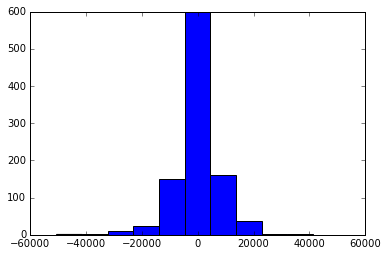

Distribution of prediction error on test data:


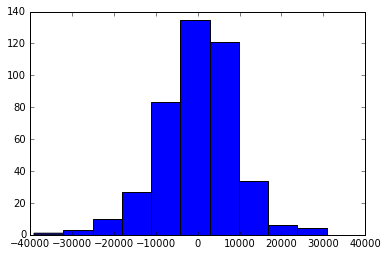

In [28]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [30]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 23481.0611532
Coefficients: 
 [  4.30657072e+01   1.13719825e+02  -1.94831046e+02 ...,   1.17340379e-02
  -3.98862338e-03   3.93028088e-04]
Residual sum of squares, training data: 0.00
Residual sum of squares, test data: 503583211.41
Variance score, training data: 1.00
Distribution of prediction error on training data:


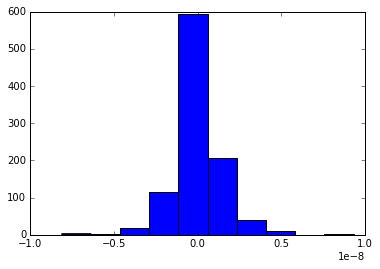

Distribution of prediction error on test data:


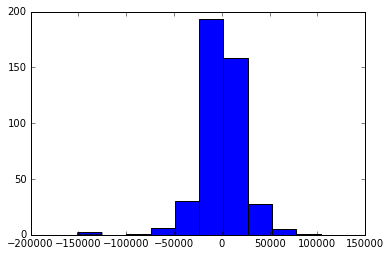

In [31]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 17798.1238858
Coefficients: 
 [  9.05553678e+03  -2.31314889e+03  -2.92261391e+03  -1.40423257e+03
   1.05082535e+03   6.04143164e+03  -4.79305973e+03  -5.41919224e+03
  -3.21539285e+03   2.07703678e+03  -7.44184695e+02  -1.53115461e+03
  -4.53578115e+03  -5.42863779e+03  -6.39844304e+02   4.94663274e+02
  -3.31554412e+03  -7.18984115e+03  -1.88024591e+03  -3.12538852e+03
   0.00000000e+00   2.87211818e+03  -2.48958418e+03   1.69649279e+03
  -3.57499704e+03  -1.63712496e+03   9.68674222e+02  -4.86386511e+03
  -1.90545913e+03  -2.50680620e+03   4.61025704e+02  -4.61025704e+02
   1.07373498e+02   2.80955274e+03  -1.85468681e+03   2.66396807e+03
  -2.93837017e+03  -6.68101583e+02   1.13152016e+03  -1.81621418e+03
   1.81621418e+03  -1.96790854e+02   1.96790854e+02  -8.30161239e+02
   2.26569322e+02   8.50834522e+03   4.45858088e+03  -5.51838842e+03
  -9.36412151e+02   4.69136688e+02   1.34737988e+02   1.50234019e+02
   6.90218089e+01   4.14027086e+01  -6.97357284e+02  -7.2841

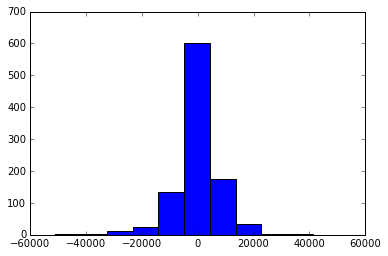

Distribution of prediction error on test data:


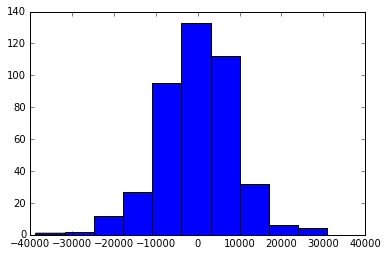

In [32]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

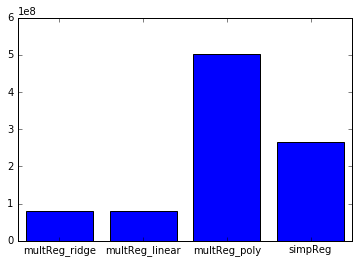

In [33]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()